In [53]:
import numpy as np

### TILE SPLITS

In [54]:
t = 8       #8x8 tiles
nw = (2,2)  #num windows (xy)
ws = (3,2)  #size of windows (wh)
a = np.arange(np.prod(nw)*np.prod(ws)*(t**2)).reshape(nw[1]*ws[1]*t,nw[0]*ws[0]*t)
print(a.shape)
print(a[0])

(32, 48)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]


In [55]:
#view a single tile
a[:t,:t]

array([[  0,   1,   2,   3,   4,   5,   6,   7],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 96,  97,  98,  99, 100, 101, 102, 103],
       [144, 145, 146, 147, 148, 149, 150, 151],
       [192, 193, 194, 195, 196, 197, 198, 199],
       [240, 241, 242, 243, 244, 245, 246, 247],
       [288, 289, 290, 291, 292, 293, 294, 295],
       [336, 337, 338, 339, 340, 341, 342, 343]])

In [56]:
#make windows
b = []
for y in range(nw[1]):
    for x in range(nw[0]):
        window = []
        ox = x*(t*ws[0])
        oy = y*(t*ws[1])
        for h in range(ws[1]):
            for w in range(ws[0]):
                tile = (a[(oy+h*t):(oy+t*(h+1)),(ox+w*t):(ox+t*(w+1))])
                window.append(tile)
        b.append(window)
 
b = np.array(b).reshape(np.prod(nw),ws[1],ws[0],t,t)
print(b.shape)
print(b)

(4, 2, 3, 8, 8)
[[[[[   0    1    2 ...    5    6    7]
    [  48   49   50 ...   53   54   55]
    [  96   97   98 ...  101  102  103]
    ...
    [ 240  241  242 ...  245  246  247]
    [ 288  289  290 ...  293  294  295]
    [ 336  337  338 ...  341  342  343]]

   [[   8    9   10 ...   13   14   15]
    [  56   57   58 ...   61   62   63]
    [ 104  105  106 ...  109  110  111]
    ...
    [ 248  249  250 ...  253  254  255]
    [ 296  297  298 ...  301  302  303]
    [ 344  345  346 ...  349  350  351]]

   [[  16   17   18 ...   21   22   23]
    [  64   65   66 ...   69   70   71]
    [ 112  113  114 ...  117  118  119]
    ...
    [ 256  257  258 ...  261  262  263]
    [ 304  305  306 ...  309  310  311]
    [ 352  353  354 ...  357  358  359]]]


  [[[ 384  385  386 ...  389  390  391]
    [ 432  433  434 ...  437  438  439]
    [ 480  481  482 ...  485  486  487]
    ...
    [ 624  625  626 ...  629  630  631]
    [ 672  673  674 ...  677  678  679]
    [ 720  721  722 ... 

In [57]:
e = b[0][0][0][:,:4]
f = b[0][1][0][:,:4]
q = b[1][0][0][:,:4]
r = e[:]
g = np.hstack((r,f))
g = np.hstack((g,q))
g = np.vstack((g,g))
print(g)

[[  0   1   2   3 384 385 386 387  24  25  26  27]
 [ 48  49  50  51 432 433 434 435  72  73  74  75]
 [ 96  97  98  99 480 481 482 483 120 121 122 123]
 [144 145 146 147 528 529 530 531 168 169 170 171]
 [192 193 194 195 576 577 578 579 216 217 218 219]
 [240 241 242 243 624 625 626 627 264 265 266 267]
 [288 289 290 291 672 673 674 675 312 313 314 315]
 [336 337 338 339 720 721 722 723 360 361 362 363]
 [  0   1   2   3 384 385 386 387  24  25  26  27]
 [ 48  49  50  51 432 433 434 435  72  73  74  75]
 [ 96  97  98  99 480 481 482 483 120 121 122 123]
 [144 145 146 147 528 529 530 531 168 169 170 171]
 [192 193 194 195 576 577 578 579 216 217 218 219]
 [240 241 242 243 624 625 626 627 264 265 266 267]
 [288 289 290 291 672 673 674 675 312 313 314 315]
 [336 337 338 339 720 721 722 723 360 361 362 363]]


In [58]:
tileset = list(range(10))
a = np.random.choice(tileset,np.prod(nw)*np.prod(ws)).reshape(nw[1]*ws[1],nw[0]*ws[0])
print(a)
print(a.shape)

[[3 2 2 8 3 4]
 [6 5 6 2 0 0]
 [4 2 3 7 8 3]
 [3 8 4 9 2 7]]
(4, 6)


In [59]:
#make windows
b = []
for y in range(nw[1]):
    for x in range(nw[0]):
        window = []
        ox = x*(ws[0])
        oy = y*(ws[1])
        for h in range(ws[1]):
            for w in range(ws[0]):
                tile = (a[(oy+h):(oy+(h+1)),(ox+w):(ox+(w+1))])
                window.append(tile)
        b.append(window)
 
b = np.array(b).reshape(np.prod(nw),ws[1],ws[0])
print(b.shape)
print(b)

(4, 2, 3)
[[[3 2 2]
  [6 5 6]]

 [[8 3 4]
  [2 0 0]]

 [[4 2 3]
  [3 8 4]]

 [[7 8 3]
  [9 2 7]]]


In [60]:
#BORDER
barr = np.array([['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
         ['x','1','_','_','_','_','1','x','2','_','_','_','_','2','x'],
         ['x','_','_','_','_','_','_','x','_','_','_','_','_','_','x'],
         ['x','1','_','_','_','_','1','x','2','_','_','_','_','2','x'],
         ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
         ['x','3','_','_','_','_','3','x','4','_','_','_','_','4','x'],
         ['x','_','_','_','_','_','_','x','_','_','_','_','_','_','x'],
         ['x','3','_','_','_','_','3','x','4','_','_','_','_','4','x'],
         ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x']])

ws = (6,3)
err = barr[:]
bord = 1

In [61]:
hbor = list(range(0,barr.shape[0],ws[1]+bord))
vbor = list(range(0,barr.shape[1],ws[0]+bord))
print(hbor)
print(vbor)

[0, 4, 8]
[0, 7, 14]


In [62]:
err = np.delete(err, hbor, axis=0)
err = np.delete(err, vbor, axis=1)
print(err)

[['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']]


In [63]:
barr2 = np.array([['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','1','_','_','_','_','1','x','x','2','_','_','_','_','2','x','x'],
                  ['x','x','_','_','_','_','_','_','x','x','_','_','_','_','_','_','x','x'],
                  ['x','x','1','_','_','_','_','1','x','x','2','_','_','_','_','2','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','3','_','_','_','_','3','x','x','4','_','_','_','_','4','x','x'],
                  ['x','x','_','_','_','_','_','_','x','x','_','_','_','_','_','_','x','x'],
                  ['x','x','3','_','_','_','_','3','x','x','4','_','_','_','_','4','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x']])
ws = (6,3)
err2 = barr2[:]
bord = 2

hbor = []
for b in range(bord):
    hbor += list(range(b,barr2.shape[0],ws[1]+bord))
vbor = []
for b in range(bord):
    vbor += list(range(b,barr2.shape[1],ws[0]+bord))
print(hbor)
print(vbor)

[0, 5, 10, 1, 6, 11]
[0, 8, 16, 1, 9, 17]


In [64]:
err2 = np.delete(err2, hbor, axis=0)
err2 = np.delete(err2, vbor, axis=1)
print(err2)

[['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']]


In [65]:
err3 = barr2[:]
for f in vbor:
    err3[:,f] = 'o'
for h in hbor:
    err3[h,:] = 'o'
print(err3)

[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' '1' '_' '_' '_' '_' '1' 'o' 'o' '2' '_' '_' '_' '_' '2' 'o' 'o']
 ['o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o']
 ['o' 'o' '1' '_' '_' '_' '_' '1' 'o' 'o' '2' '_' '_' '_' '_' '2' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' '3' '_' '_' '_' '_' '3' 'o' 'o' '4' '_' '_' '_' '_' '4' 'o' 'o']
 ['o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o']
 ['o' 'o' '3' '_' '_' '_' '_' '3' 'o' 'o' '4' '_' '_' '_' '_' '4' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']]


### CLUSTERING

In [255]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

#convert hex string tile to 2d color based tile
def tile2Color(t_str,tsize):
    t = []
    i = 0
    tt = t_str.split(",")
    for x in range(tsize):
        tx = []
        for y in range(tsize):
            tx.append(int(tt[i],16))		#convert from hex based to decimal int based
            i+=1
        t.append(tx)
    return np.array(t,dtype='uint8')		#original format of tile

#convert color number based 2d array tile to string format
def tile2Str(t):
    t2 = t.flatten()
    t2 = ",".join([str(hex(x)) for x in t2])		#make hex valued string for easy storage
    return t2

#shows the members of the cluster
def showCluster(c):
    n = len(c)
    s = int(math.sqrt(n))
    w = math.ceil(n/s)
    plt.figure(figsize=(3.0,3.0))
    for i in range(n):
        plt.subplot(s,w,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(tile2Color(c[i],16).squeeze(),cmap='gray')
    plt.show()

In [67]:
#import tileset
from scripts.tile_map_maker import TileMapMaker

#get tileset and windows from tile map maker
TMM = TileMapMaker('maps/links_awakening.png')
window_size = (10,9)
ts = TMM.importTileSet()
wm = TMM.importWindows()

In [68]:
# EXPERIMENT 1 - cluster by same tile proximity

dirs = ['n','s','e','w']
d_map = {'n':(-1,0),'s':(1,0),'w':(0,-1),'e':(0,1)}

#return coordinates of a specific tile in a window map
def tileCoords(t,m):
    s = np.where(m == t)
    l = list(zip(s[0],s[1]))
    return l

#calculate the percentage of a tile that are the same as it in a given adjacent direction
def sameTilePerc(t,d,windows):
    m = windows.reshape(np.prod(windows.shape[:2]),windows.shape[2],windows.shape[3])
    total_tiles = 0
    perc_amt = 0
    
    #iterate through every window
    for w in m:
        coords = tileCoords(t, w)
        
        #no tiles here
        n = len(coords)
        if n == 0:
            continue
        
        #get directional position of tile
        coords_alt = list(map(lambda x: tuple(np.add(x,d_map[d])), coords))  
        
        #count up same tiles in the adjacent direction
        p = 0
        for c in coords_alt:
            if c in coords:
                p += 1
        
        total_tiles += n
        perc_amt += p
        
    if total_tiles > 0: 
        return round(perc_amt/total_tiles,7)
    return 0

#get all tile percentages
def allTilePerc(tset,w):
    atd = {}
    
    #get all tiles adjacent percentages
    for t in tset:
        td = {}
        for d in dirs:
            td[d] = sameTilePerc(t,d,w)
        atd[t] = td
    return atd
        

In [69]:
tiles = list(map(lambda x: str(x), ts.keys()))
tile_percentages = allTilePerc(tiles, wm)
for k,v in tile_percentages.items():
    print(str(k) + ":" + str(v))

0:{'n': 0.5323264, 's': 0.5323264, 'e': 0.5771065, 'w': 0.5771065}
1:{'n': 0.6270317, 's': 0.6270317, 'e': 0.609923, 'w': 0.609923}
2:{'n': 0.4584838, 's': 0.4584838, 'e': 0.5857401, 'w': 0.5857401}
3:{'n': 0.3541867, 's': 0.3541867, 'e': 0.6833494, 'w': 0.6833494}
4:{'n': 0.4372385, 's': 0.4372385, 'e': 0.5094142, 'w': 0.5094142}
5:{'n': 0.0052288, 's': 0.0052288, 'e': 0.6575163, 'w': 0.6575163}
6:{'n': 0.6447368, 's': 0.6447368, 'e': 0.731203, 'w': 0.731203}
7:{'n': 0.654649, 's': 0.654649, 'e': 0.0, 'w': 0.0}
8:{'n': 0.6673114, 's': 0.6673114, 'e': 0.0212766, 'w': 0.0212766}
9:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
10:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
11:{'n': 0.0, 's': 0.0, 'e': 0.6943765, 'w': 0.6943765}
12:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
13:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
14:{'n': 0.4468085, 's': 0.4468085, 'e': 0.4787234, 'w': 0.4787234}
15:{'n': 0.4363057, 's': 0.4363057, 'e': 0.7388535, 'w': 0.7388535}
16:{'n': 0.5432526, 's': 0.5432526, 'e': 0.59169

In [70]:
# K means clustering
from sklearn.cluster import KMeans
k = 7

#convert dictionary directional percentages to list in consistent format
exp1_data = []
for t in tiles:
    l = []
    for i in dirs:
        l.append(tile_percentages[t][i])
    exp1_data.append(l)
exp1_data = np.array(exp1_data)
print(exp1_data)

clusters = KMeans(n_clusters=k).fit(exp1_data)
print(clusters.labels_)

[[0.5323264 0.5323264 0.5771065 0.5771065]
 [0.6270317 0.6270317 0.609923  0.609923 ]
 [0.4584838 0.4584838 0.5857401 0.5857401]
 [0.3541867 0.3541867 0.6833494 0.6833494]
 [0.4372385 0.4372385 0.5094142 0.5094142]
 [0.0052288 0.0052288 0.6575163 0.6575163]
 [0.6447368 0.6447368 0.731203  0.731203 ]
 [0.654649  0.654649  0.        0.       ]
 [0.6673114 0.6673114 0.0212766 0.0212766]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.6943765 0.6943765]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.4468085 0.4468085 0.4787234 0.4787234]
 [0.4363057 0.4363057 0.7388535 0.7388535]
 [0.5432526 0.5432526 0.5916955 0.5916955]
 [0.3925926 0.3925926 0.4740741 0.4740741]
 [0.0502092 0.0502092 0.0669456 0.0669456]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.1016949 0.1016949 0.2768362 0.2768362]
 [0.5783133 0.5783133 0.3674699 0.3674699]
 [0.3164557

CLUSTER: 0 - 15/196


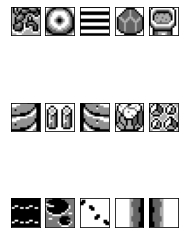

CLUSTER: 1 - 112/196


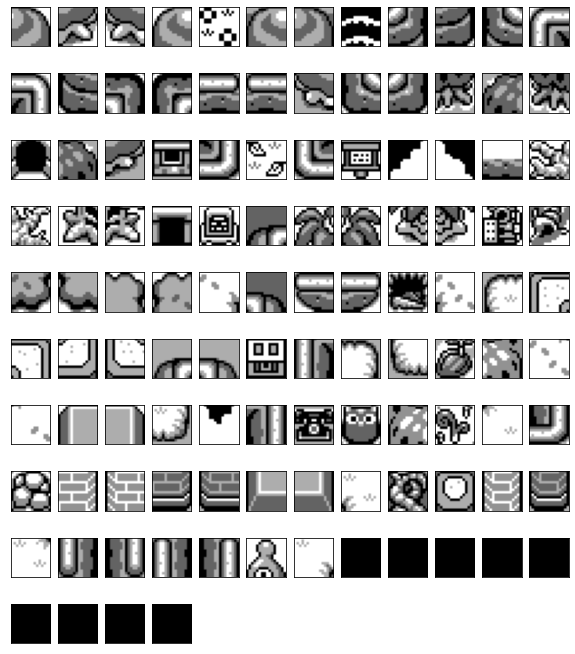

CLUSTER: 2 - 8/196


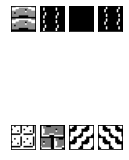

CLUSTER: 3 - 14/196


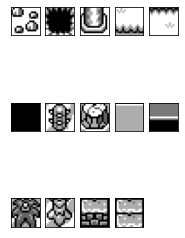

CLUSTER: 4 - 17/196


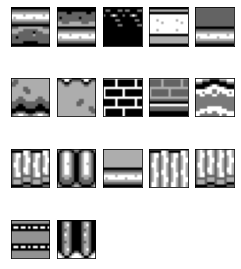

CLUSTER: 5 - 10/196


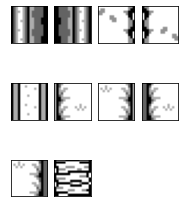

CLUSTER: 6 - 20/196


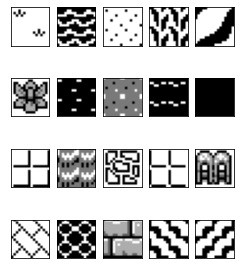

In [71]:
#show the clusters
for i in range(k):
    #get the tiles in a group
    ind = np.squeeze(np.where(clusters.labels_ == i))
    #print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

In [72]:
# EXPERIMENT 2 - cluster by window (binary presence)

#see if tile is in a window (get counts)
def inWinBin(t,w):
    return 1 if t in w else 0
#see if tile is in a window (get counts)
def inWinMult(t,w):
    return (w==t).sum()

#get all tile window locations
def allTileWinLoc(tset,win):
    m = win.reshape(np.prod(win.shape[:2]),win.shape[2],win.shape[3])
    tloc = {}
    for t in tset:
        twin = []
        for w in m:
            twin.append(inWinBin(t,w))
        tloc[t] = twin
    return tloc

In [73]:
tile_windows = allTileWinLoc(tiles,wm)

In [74]:
# K means clustering
k = 7

#convert dictionary values to list in consistent format
exp2_data = []
for t in tiles:
    exp2_data.append(tile_windows[t])
exp2_data = np.array(exp2_data)
print(exp2_data)

clusters = KMeans(n_clusters=k).fit(exp2_data)
print(clusters.labels_)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 4 0 6 5 6 1 6 6 5 5 4 5 5 3 1 1 1 5 3 3 0 1 1 0 1 1 1 0 1 0 2 0 2 0 1 1
 2 0 1 2 1 0 1 4 3 4 1 3 1 2 1 2 3 0 4 1 4 3 3 0 1 1 1 1 1 1 1 0 1 3 1 0 1
 1 4 3 1 0 4 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 3 1 0 1 1 1 1 1 1 1 3 1 0 3
 1 3 3 3 1 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


CLUSTER: 0 - 23/196


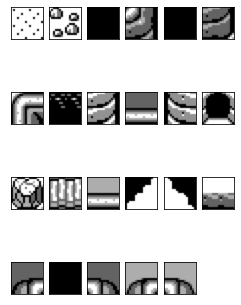

CLUSTER: 1 - 129/196


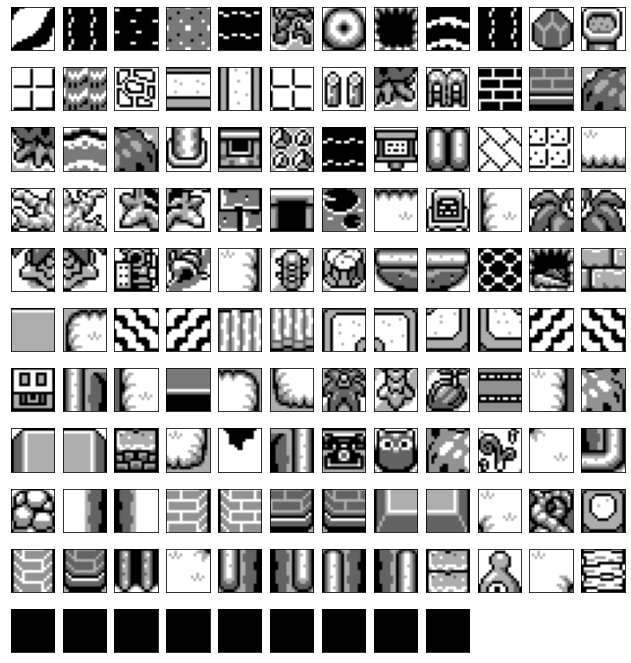

CLUSTER: 2 - 6/196


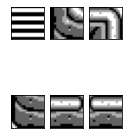

CLUSTER: 3 - 19/196


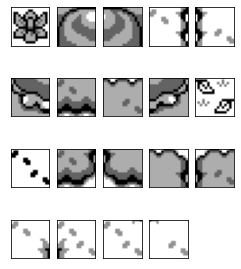

CLUSTER: 4 - 8/196


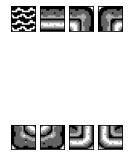

CLUSTER: 5 - 7/196


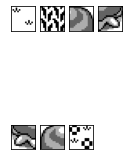

CLUSTER: 6 - 4/196


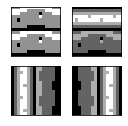

In [75]:
#show the clusters
for i in range(k):
    #get the tiles in a group
    ind = np.squeeze(np.where(clusters.labels_ == i))
    #print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

In [76]:
# EXPERIMENT 3 - EXP1+EXP2
def combineData(dataArr):
    d = dataArr[0][:]
    for i in range(1,len(dataArr)):
        d = np.hstack((d,dataArr[i]))
    return d
exp3_data = combineData([exp1_data,exp2_data])
print(exp3_data.shape)

(196, 228)


In [77]:
# K means clustering
k = 10
clusters3 = KMeans(n_clusters=k).fit(exp3_data)
print(clusters3.labels_)

[2 5 7 1 2 1 0 8 4 2 2 5 2 2 9 3 0 0 2 9 9 7 3 3 0 0 0 0 8 3 0 5 8 4 8 0 0
 4 0 0 4 0 0 0 5 9 5 6 9 6 0 6 0 9 0 5 0 5 9 9 0 3 0 6 6 3 3 0 0 3 9 0 0 0
 0 5 9 3 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 9 0 0 9
 0 9 9 9 0 0 0 0 0 0 9 0 0 0 0 0 0 0 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 9 9 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


CLUSTER: 0 - 125/196


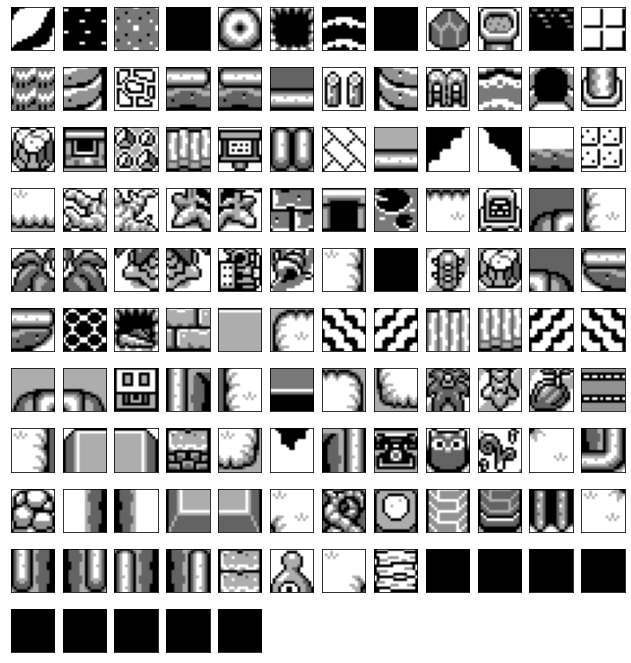

CLUSTER: 1 - 2/196


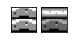

CLUSTER: 2 - 7/196


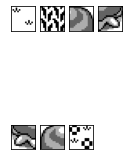

CLUSTER: 3 - 11/196


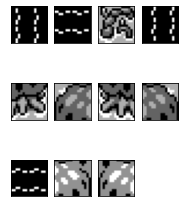

CLUSTER: 4 - 4/196


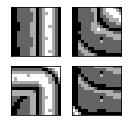

CLUSTER: 5 - 9/196


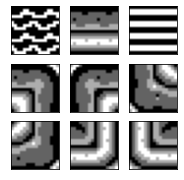

CLUSTER: 6 - 13/196


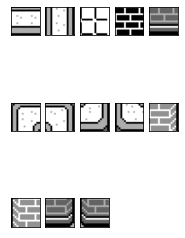

CLUSTER: 7 - 2/196


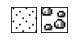

CLUSTER: 8 - 4/196


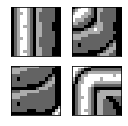

CLUSTER: 9 - 19/196


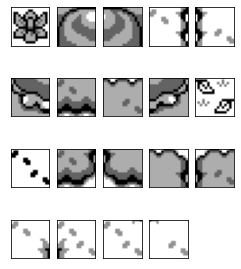

In [78]:
#show the clusters
for i in range(k):
    #get the tiles in a group
    ind = np.squeeze(np.where(clusters3.labels_ == i))
    #print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

In [79]:
ind = np.squeeze(np.where(clusters3.labels_ == 0))
#print(ind[5])
#spooky tree base == 91,92

In [80]:
# EXPERIMENT 4 - MIRROR TILES

#return whether mirror image of tile exists in the data
def mirrorTile(t,tset):
    a = tile2Color(t,16)   #convert to color for flipping
    
    flipH = tile2Str(np.flip(a,0))
    flipV = tile2Str(np.flip(a,1))
    flipD = tile2Str(np.flip(np.flip(a,0),1))
    return 1 if t != flipH and t != flipV and ((flipH in tset) or (flipV in tset) or (flipD in tset)) else 0

#find whether all tiles have mirror images
def allTileMirror(tset):
    m = {}
    tile_ind = list(tset.keys())
    raw_tiles = list(tset.values())
    for t in tile_ind:
        m[str(t)] = mirrorTile(tset[t],raw_tiles)
    return m

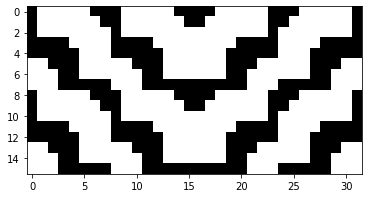

In [81]:
#91 check
plt.imshow(np.hstack((tile2Color(ts[125],16).squeeze(),tile2Color(ts[126],16).squeeze())),cmap='gray')

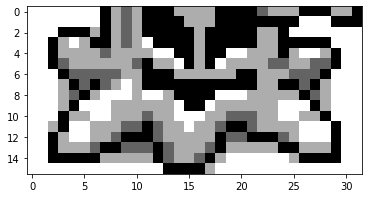

In [82]:
#91 check
plt.imshow(np.hstack((tile2Color(ts[91],16).squeeze(),tile2Color(ts[92],16).squeeze())),cmap='gray')

In [83]:
mirrorTiles = allTileMirror(ts)
print(mirrorTiles)

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 1, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 1, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 1, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 0, '65': 0, '66': 0, '67': 0, '68': 0, '69': 0, '70': 0, '71': 0, '72': 0, '73': 0, '74': 0, '75': 0, '76': 0, '77': 1, '78': 0, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 0, '87': 0, '88': 0, '89': 0, '90': 0, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 0, '98': 0, '99': 0, '100': 0, '101': 0, '102': 0, '103': 0, '104': 0, '105': 0, '106': 0, '107': 0, '108': 0, '109': 0, '110': 0,

In [84]:
exp4_data = []
for t in tiles:
    #exp4_data.append([10 if mirrorTiles[t] else 0])
    exp4_data.append([mirrorTiles[t]])
exp4_data = np.array(exp4_data)
print(exp4_data)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


MIRROR TILES


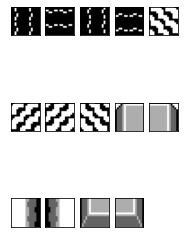

In [85]:
#show the mirror groups
#get the tiles in a group
ind = np.squeeze(np.where(exp4_data.squeeze() == 1))
#print(ind)
c = []
for t in ind:
    c.append(ts[t])
        
print("MIRROR TILES")
showCluster(np.array(c))

In [86]:
# K means clustering (ALL data)
k = 10
clusters4 = KMeans(n_clusters=k).fit(combineData([exp3_data,exp4_data]))
print(clusters4.labels_)

[1 4 8 5 1 5 0 5 4 1 1 4 1 1 2 7 0 0 1 2 2 8 7 7 8 0 2 0 5 7 8 6 5 3 5 0 0
 4 8 0 3 0 8 0 4 2 4 9 2 9 6 9 6 2 8 4 0 4 2 2 8 7 0 9 9 7 7 0 3 7 2 0 8 0
 0 4 2 7 8 4 0 0 9 8 8 8 0 0 0 0 0 0 0 0 0 0 0 2 0 8 0 0 0 0 0 0 0 2 0 8 2
 0 2 2 2 0 8 0 0 0 0 2 0 0 0 0 0 0 0 9 9 9 9 0 0 8 8 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 9 9 9 9 0 0 0 0 9 9 9 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


CLUSTER: 0 - 102/196


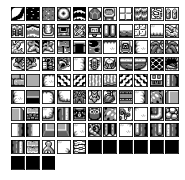

CLUSTER: 1 - 7/196


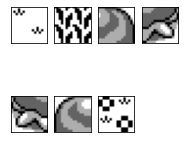

CLUSTER: 2 - 20/196


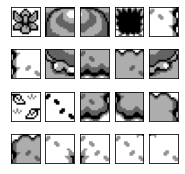

CLUSTER: 3 - 3/196


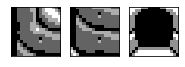

CLUSTER: 4 - 10/196


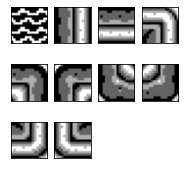

CLUSTER: 5 - 6/196


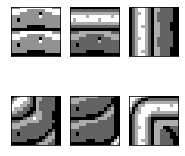

CLUSTER: 6 - 3/196


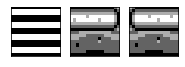

In [259]:
#show the clusters
for i in range(k):
    #get the tiles in a group
    ind = np.squeeze(np.where(clusters4.labels_ == i))
    #print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

In [230]:
# EXPERIMENT 5 - ALMOST MIRROR TILES

#check if tile matches certain %
def partTileMatch(a,b,p):
    #check if same tile shape
    if len(a) != len(b):
        return 0
    
    m = 0         #count matches
    m1 = 0         #count mismatches
    
    p1 = 1.0-p
    
    t = (len(a)*p)    #number of tiles for matching
    t1 = (len(a)*p1)  #number of tiles for mismatching
    
    #iterate over all tiles
    for i in range(len(a)):
        if b[i] == a[i]:   #match
            m += 1
        else:                    #no match
            m1 += 1
                
        if m >= t:
            return 1    #enough matches
        if m1 > t1:
            return 0    #too many mismatches
            
    return 0


#return whether mirror image of tile exists in the data (2 if mirror itself, 1 if mirror another tile)
def almostMirrorTile(t,tset,p):
    a = tile2Color(t,16)   #convert to color for flipping
    
    flipH = tile2Str(np.flip(a,0))
    flipV = tile2Str(np.flip(a,1))
    flipD = tile2Str(np.flip(np.flip(a,0),1))
    
    #duplicates are auto mirror
    if flipH == t or flipV == t or flipD == t:
        return 2
    
    for i in tset:
        if partTileMatch(flipH,i,p):
            return 2 if i == t else 1
        if partTileMatch(flipV,i,p):
            return 2 if i == t else 1
        if partTileMatch(flipD,i,p):
            return 2 if i == t else 1
    return 0
    

#find whether all tiles have mirror images
def allTileAlmostMirror(tset,p):
    m = {}
    tile_ind = list(tset.keys())
    raw_tiles = list(tset.values())
    for t in tile_ind:
        m[str(t)] = almostMirrorTile(tset[t],raw_tiles,p)
    return m

In [231]:
%time
almostMirrorTile(ts[125],list(ts.values()),1.0)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


1

In [232]:
%time
mirrorTile(ts[125],list(ts.values()))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


1

In [233]:
%time
atam = allTileAlmostMirror(ts,0.7)
print(atam)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
{'0': 2, '1': 1, '2': 1, '3': 2, '4': 1, '5': 2, '6': 1, '7': 1, '8': 1, '9': 1, '10': 1, '11': 2, '12': 1, '13': 1, '14': 2, '15': 1, '16': 1, '17': 1, '18': 1, '19': 1, '20': 1, '21': 1, '22': 1, '23': 0, '24': 2, '25': 2, '26': 2, '27': 1, '28': 1, '29': 1, '30': 2, '31': 2, '32': 1, '33': 1, '34': 1, '35': 2, '36': 0, '37': 1, '38': 1, '39': 1, '40': 1, '41': 1, '42': 1, '43': 1, '44': 0, '45': 1, '46': 0, '47': 2, '48': 1, '49': 2, '50': 1, '51': 1, '52': 1, '53': 0, '54': 2, '55': 1, '56': 2, '57': 1, '58': 2, '59': 2, '60': 1, '61': 0, '62': 0, '63': 1, '64': 2, '65': 1, '66': 0, '67': 1, '68': 2, '69': 1, '70': 0, '71': 0, '72': 2, '73': 2, '74': 0, '75': 1, '76': 1, '77': 1, '78': 2, '79': 1, '80': 2, '81': 2, '82': 1, '83': 1, '84': 1, '85': 1, '86': 2, '87': 1, '88': 2, '89': 0, '90': 0, '91': 0, '92': 0, '93': 1, '94': 2, '95': 1, '96': 1, '97': 1, '98': 2, '99': 0, '100': 1, '101': 0, '102': 0, '103': 0, '104'

MIRROR TILES
100


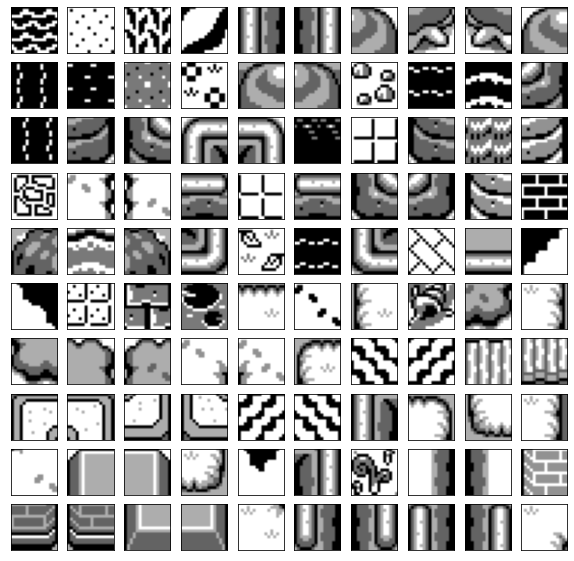

SELF MIRROR TILES
61


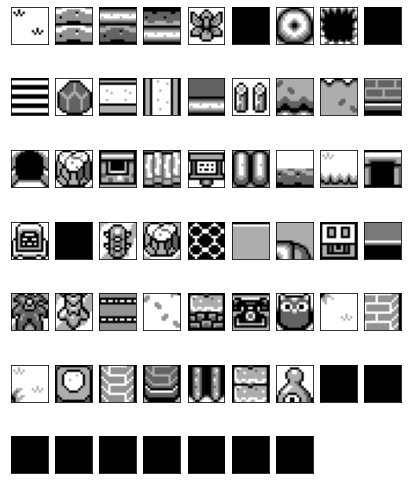

In [234]:
exp5_data = []
for t in tiles:
    #exp4_data.append([10 if mirrorTiles[t] else 0])
    exp5_data.append([atam[t]])
exp5_data = np.array(exp5_data)

#show the mirror groups
#get the tiles in a group
ind = np.squeeze(np.where(exp5_data.squeeze() == 1))
#print(ind)
c = []
for t in ind:
    c.append(ts[t])
        
print("MIRROR TILES")
print(len(c))
showCluster(np.array(c))



ind2 = np.squeeze(np.where(exp5_data.squeeze() == 2))
#print(ind)
c2 = []
for t in ind2:
    c2.append(ts[t])
        
print("SELF MIRROR TILES")
print(len(c2))
showCluster(np.array(c2))


In [235]:
# K means clustering (tile surrounding + window + partial mirror)
k = 10
clusters5 = KMeans(n_clusters=k).fit(combineData([exp3_data,exp5_data]))
print(clusters5.labels_)

[8 7 3 4 8 4 2 7 5 8 8 7 8 8 0 9 2 2 1 0 0 3 9 9 3 2 0 2 4 9 3 6 4 5 4 2 2
 5 3 2 5 2 3 2 7 0 7 2 0 2 6 2 6 0 3 7 2 7 0 0 3 9 2 2 2 9 9 2 3 9 0 2 3 2
 2 7 0 9 3 7 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 0 2 3 2 2 2 2 2 2 2 0 2 3 0
 2 0 0 0 2 3 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


CLUSTER: 0 - 20/196


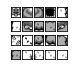

CLUSTER: 1 - 1/196


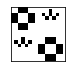

CLUSTER: 2 - 119/196


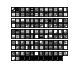

In [253]:
#show the clusters
for i in range(k):
    #get the tiles in a group
    ind = np.squeeze(np.where(clusters5.labels_ == i))
    ind = np.atleast_1d(np.array(ind))
    #print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

In [257]:
# EXPERIMENT 6 - Cascading clustering (tile+window first - then mirror in largest cluster)

#make cluster first 
k = 7
cluster6 = KMeans(n_clusters=k).fit(exp3_data)
l = list(cluster6.labels_)

big_label = max(set(l), key = l.count)

#get all elements of biggest cluster
b_cluster = {}
ind = np.squeeze(np.where(l == big_label))

#make subset clusters from largest dataset
for t in ind:
    n = atam[str(t)]
    if n == 0:
        l[t] = l[t]
    else:
        l[t] = k+n-1
    
print(cluster6.labels_)
print(l)

[1 4 2 2 1 6 0 4 6 1 1 4 1 1 3 0 0 0 1 3 3 2 0 0 0 0 3 0 2 0 0 4 2 2 2 0 0
 4 0 0 2 0 0 0 4 3 4 5 3 5 2 5 2 3 0 4 0 4 3 3 0 0 0 5 5 0 0 0 2 0 3 0 0 0
 0 4 3 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 3
 0 3 3 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[1, 4, 2, 2, 1, 6, 7, 4, 6, 1, 1, 4, 1, 1, 3, 7, 7, 7, 1, 3, 3, 2, 7, 0, 8, 8, 3, 7, 2, 7, 8, 4, 2, 2, 2, 8, 0, 4, 7, 7, 2, 7, 7, 7, 4, 3, 4, 5, 3, 5, 2, 5, 2, 3, 8, 4, 8, 4, 3, 3, 7, 0, 0, 5, 5, 7, 0, 7, 2, 7, 3, 0, 8, 8, 0, 4, 3, 7, 8, 4, 8, 8, 7, 7, 7, 7, 8, 7, 8, 0, 0, 0, 0, 7, 8, 7, 7, 3, 8, 0, 7, 0, 0, 0, 0, 0, 7, 3, 7, 8, 3, 8, 3, 3, 3, 8, 0, 0, 0, 8, 0, 3, 0, 8, 7, 7, 7, 7, 7, 5, 5, 5, 5, 7, 7, 0, 8, 8, 7, 0, 8, 7, 7, 8, 8, 0, 8, 7, 0, 3, 3, 7, 7, 8, 7, 7, 7, 8, 8, 0, 7, 8, 0, 0, 7, 7, 5, 5, 5, 5, 7, 7, 8, 0, 8, 8, 8, 8, 7, 7, 7, 7, 7, 8, 8, 7, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8]


[ 23  36  61  62  66  71  74  89  90  91  92  99 101 102 103 104 105 116
 117 118 120 122 135 139 145 148 159 162 163 173 186]
CLUSTER: 0 - 31/196


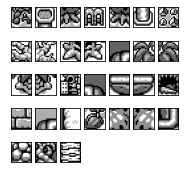

[ 0  4  9 10 12 13 18]
CLUSTER: 1 - 7/196


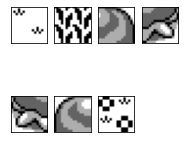

[ 2  3 21 28 32 33 34 40 50 52 68]
CLUSTER: 2 - 11/196


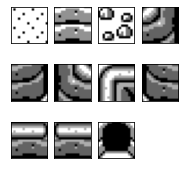

[ 14  19  20  26  45  48  53  58  59  70  76  97 107 110 112 113 114 121
 149 150]
CLUSTER: 3 - 20/196


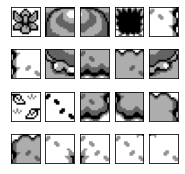

[ 1  7 11 31 37 44 46 55 57 75 79]
CLUSTER: 4 - 11/196


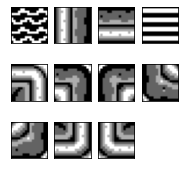

[ 47  49  51  63  64 129 130 131 132 166 167 168 169]
CLUSTER: 5 - 13/196


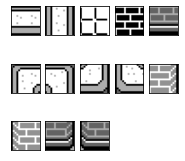

[5 8]
CLUSTER: 6 - 2/196


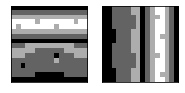

[  6  15  16  17  22  27  29  38  39  41  42  43  60  65  67  69  77  82
  83  84  85  87  93  95  96 100 106 108 124 125 126 127 128 133 134 138
 141 142 147 151 152 154 155 156 160 164 165 170 171 178 179 180 181 182
 185]
CLUSTER: 7 - 55/196


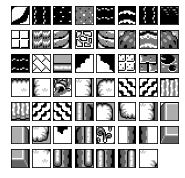

[ 24  25  30  35  54  56  72  73  78  80  81  86  88  94  98 109 111 115
 119 123 136 137 140 143 144 146 153 157 158 161 172 174 175 176 177 183
 184 187 188 189 190 191 192 193 194 195]
CLUSTER: 8 - 46/196


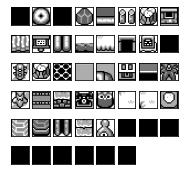

In [258]:
#show the clusters
for i in range(k+2):
    #get the tiles in a group
    ind = np.squeeze(np.where(np.array(l) == i))
    ind = np.atleast_1d(np.array(ind))
    print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    if len(c) == 0:
        continue
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

In [240]:
# EXPERIMENT 7 - Cascading clustering (mirror then tile+window clustering)
ml = np.array(list(atam.values()))
non_mirror_ind = np.squeeze(np.where(ml == 0))
print(ml)

exp_nm_data = []
for i in non_mirror_ind:
    exp_nm_data.append(exp3_data[i])
exp_nm_data = np.array(exp_nm_data)

k = 3
cluster7 = KMeans(n_clusters=k).fit(exp_nm_data)
l = list(cluster7.labels_ + 3)

o = 0
for i in non_mirror_ind:
    ml[i] = l[o]
    o += 1
    
print(ml)

[2 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 0 2 2 2 1 1 1 2 2 1 1 1 2 0
 1 1 1 1 1 1 1 0 1 0 2 1 2 1 1 1 0 2 1 2 1 2 2 1 0 0 1 2 1 0 1 2 1 0 0 2 2
 0 1 1 1 2 1 2 2 1 1 1 1 2 1 2 0 0 0 0 1 2 1 1 1 2 0 1 0 0 0 0 0 1 1 1 2 1
 2 1 1 1 2 0 0 0 2 0 1 0 2 1 1 1 1 1 1 1 1 1 1 1 0 2 2 1 0 2 1 1 2 2 0 2 1
 0 2 1 1 1 2 1 1 1 2 2 0 1 2 0 0 1 1 2 1 1 1 1 1 2 0 2 2 2 2 1 1 1 1 1 2 2
 1 0 2 2 2 2 2 2 2 2 2]
[2 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 4 2 2 2 1 1 1 2 2 1 1 1 2 4
 1 1 1 1 1 1 1 5 1 5 2 1 2 1 1 1 4 2 1 2 1 2 2 1 4 4 1 2 1 4 1 2 1 4 4 2 2
 4 1 1 1 2 1 2 2 1 1 1 1 2 1 2 4 4 4 4 1 2 1 1 1 2 4 1 3 3 3 3 4 1 1 1 2 1
 2 1 1 1 2 4 4 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 4 2 2 1 4 2 1 1 2 2 3 2 1
 4 2 1 1 1 2 1 1 1 2 2 4 1 2 4 4 1 1 2 1 1 1 1 1 2 4 2 2 2 2 1 1 1 1 1 2 2
 1 4 2 2 2 2 2 2 2 2 2]


[  1   2   4   6   7   8   9  10  12  13  15  16  17  18  19  20  21  22
  27  28  29  32  33  34  37  38  39  40  41  42  43  45  48  50  51  52
  55  57  60  63  65  67  69  75  76  77  79  82  83  84  85  87  93  95
  96  97 100 106 107 108 110 112 113 114 121 124 125 126 127 128 129 130
 131 132 133 134 138 141 142 147 150 151 152 154 155 156 160 164 165 167
 168 169 170 171 178 179 180 181 182 185]
CLUSTER: 1 - 100/196


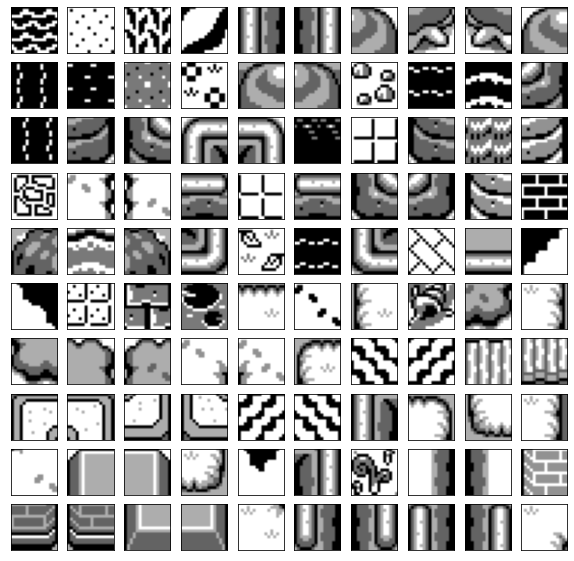

[  0   3   5  11  14  24  25  26  30  31  35  47  49  54  56  58  59  64
  68  72  73  78  80  81  86  88  94  98 109 111 115 119 123 136 137 140
 143 144 146 149 153 157 158 161 166 172 174 175 176 177 183 184 187 188
 189 190 191 192 193 194 195]
CLUSTER: 2 - 61/196


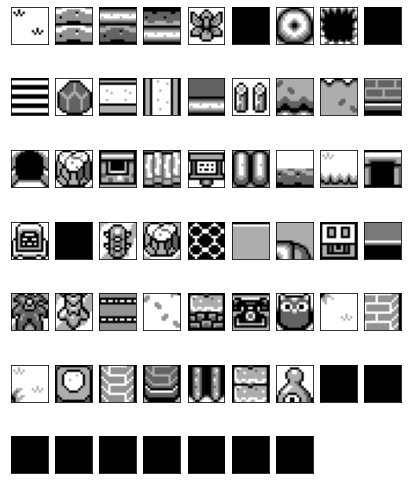

[101 102 103 104 145]
CLUSTER: 3 - 5/196


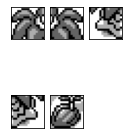

[ 23  36  53  61  62  66  70  71  74  89  90  91  92  99 105 116 117 118
 120 122 135 139 148 159 162 163 173 186]
CLUSTER: 4 - 28/196


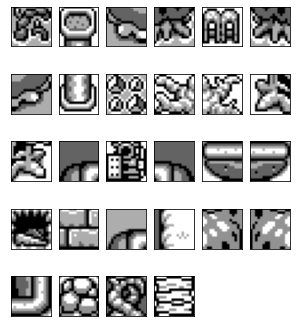

In [244]:
#show the clusters
for i in range(1,k+2):
    #get the tiles in a group
    ind = np.squeeze(np.where(np.array(ml) == i))
    ind = np.atleast_1d(np.array(ind))
    print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    if len(c) == 0:
        continue
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

2
[[248 248 248 248 168  96   0   0   0   0  96 168 248 248 248 248]
 [248 248 168  96   0   0  96  96  96  96   0   0  96 168 248 248]
 [248 168  96   0  96 168 168 168 168 168 168  96   0  96 168 248]
 [248  96   0 168 168 248 248 248 248 248 248 168 168   0  96 248]
 [168   0  96 168 248 248 248 248 248 248 248 248 168  96   0 168]
 [ 96   0 168 168 248 248 248 168 168 248 248 248 168 168   0  96]
 [  0  96 168 248 248 248 168  96  96 168 248 248 248 168  96   0]
 [  0  96 168 248 248 168  96   0   0  96 168 248 248 168  96   0]
 [  0  96 168 248 248 168  96   0   0  96 168 248 248 168  96   0]
 [  0  96 168 248 248 248 168  96  96 168 248 248 248 168  96   0]
 [  0  96 168 168 248 248 248 168 168 248 248 248 168 168  96   0]
 [  0  96  96 168 168 248 248 248 248 248 248 168 168  96  96   0]
 [  0   0  96  96 168 168 168 248 248 168 168 168  96  96   0   0]
 [ 96   0   0  96  96  96 168 168 168 168  96  96  96   0   0  96]
 [168  96   0   0  96  96  96  96  96  96  96  96   0   0  9

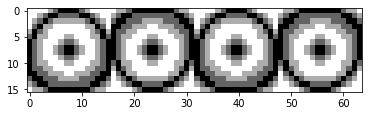

In [245]:
print(almostMirrorTile(ts[25],list(ts.values()),0.8))


#91 check
y = ts[25]
or_tile = tile2Color(y,16).squeeze()
flipH = tile2Color(tile2Str(np.flip(tile2Color(y,16),0)),16).squeeze()
flipV = tile2Color(tile2Str(np.flip(tile2Color(y,16),1)),16).squeeze()
flipD = tile2Color(tile2Str(np.flip(np.flip(tile2Color(y,16),0),1)),16).squeeze()

print(or_tile)
print(flipV)


e = np.hstack((or_tile,flipH.squeeze()))
e = np.hstack((e,flipV))
e = np.hstack((e,flipD))
plt.imshow(e,cmap='gray')

In [246]:
print(tiles)
print(ts)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [263]:
dict(zip(tiles,l))

{'0': 1,
 '1': 4,
 '2': 2,
 '3': 2,
 '4': 1,
 '5': 6,
 '6': 7,
 '7': 4,
 '8': 6,
 '9': 1,
 '10': 1,
 '11': 4,
 '12': 1,
 '13': 1,
 '14': 3,
 '15': 7,
 '16': 7,
 '17': 7,
 '18': 1,
 '19': 3,
 '20': 3,
 '21': 2,
 '22': 7,
 '23': 0,
 '24': 8,
 '25': 8,
 '26': 3,
 '27': 7,
 '28': 2,
 '29': 7,
 '30': 8,
 '31': 4,
 '32': 2,
 '33': 2,
 '34': 2,
 '35': 8,
 '36': 0,
 '37': 4,
 '38': 7,
 '39': 7,
 '40': 2,
 '41': 7,
 '42': 7,
 '43': 7,
 '44': 4,
 '45': 3,
 '46': 4,
 '47': 5,
 '48': 3,
 '49': 5,
 '50': 2,
 '51': 5,
 '52': 2,
 '53': 3,
 '54': 8,
 '55': 4,
 '56': 8,
 '57': 4,
 '58': 3,
 '59': 3,
 '60': 7,
 '61': 0,
 '62': 0,
 '63': 5,
 '64': 5,
 '65': 7,
 '66': 0,
 '67': 7,
 '68': 2,
 '69': 7,
 '70': 3,
 '71': 0,
 '72': 8,
 '73': 8,
 '74': 0,
 '75': 4,
 '76': 3,
 '77': 7,
 '78': 8,
 '79': 4,
 '80': 8,
 '81': 8,
 '82': 7,
 '83': 7,
 '84': 7,
 '85': 7,
 '86': 8,
 '87': 7,
 '88': 8,
 '89': 0,
 '90': 0,
 '91': 0,
 '92': 0,
 '93': 7,
 '94': 8,
 '95': 7,
 '96': 7,
 '97': 3,
 '98': 8,
 '99': 0,
 '100': 7,

In [305]:
# EXPERIMENT 8 - Cluster by literal tile design
tile_feat = np.array(list(map(lambda x: tile2Color(x,16).flatten(),list(ts.values()))))

In [306]:
tile_feat[100]

array([168,   0,  96, 168, 248, 248, 248, 248, 248, 248, 248, 248, 248,
       248, 248, 248, 168,   0,  96, 248, 248, 248, 248, 248, 248, 248,
       248, 248, 248, 248, 248, 248, 168,   0, 168, 248, 168, 168, 248,
       248, 248, 248, 248, 248, 248, 248, 248, 248, 168,   0, 168, 168,
       168, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 168,
         0, 168,  96, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248,
       248, 248, 168,   0,  96, 168, 248, 248, 248, 248, 248, 248, 248,
       248, 248, 248, 248, 248, 168,   0,   0, 168, 168, 168, 168, 248,
       248, 248, 248, 248, 248, 248, 248, 248, 168,   0,   0,  96, 168,
       248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 168,   0,
        96, 168, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248,
       248, 168,   0,  96, 248, 248, 248, 248, 248, 248, 248, 248, 168,
       248, 248, 248, 248, 168,   0, 168, 248, 168, 168, 248, 248, 248,
       168, 248, 168, 248, 168, 248, 248, 168,   0, 168, 168, 16

In [307]:
k = 10
cluster8 = KMeans(n_clusters=k).fit(tile_feat)
l = list(cluster8.labels_)
print(l)

[2, 2, 2, 4, 2, 6, 2, 6, 7, 9, 9, 6, 9, 5, 9, 8, 8, 8, 2, 5, 6, 2, 8, 9, 8, 5, 3, 8, 6, 8, 6, 8, 6, 4, 5, 9, 9, 5, 6, 2, 4, 8, 6, 2, 6, 1, 5, 8, 5, 1, 6, 2, 6, 9, 6, 4, 9, 6, 0, 8, 4, 9, 0, 6, 6, 6, 9, 8, 3, 6, 9, 9, 6, 4, 9, 7, 2, 8, 8, 6, 0, 7, 8, 8, 2, 2, 8, 2, 2, 8, 8, 9, 9, 8, 4, 9, 2, 8, 5, 6, 2, 9, 4, 9, 9, 6, 8, 0, 1, 2, 0, 9, 1, 5, 8, 6, 6, 6, 6, 8, 4, 8, 8, 8, 8, 2, 2, 8, 8, 5, 1, 1, 8, 2, 2, 8, 8, 6, 6, 8, 8, 1, 8, 6, 9, 9, 4, 1, 6, 8, 8, 5, 1, 6, 1, 2, 7, 4, 6, 6, 8, 2, 7, 4, 1, 5, 6, 6, 6, 6, 5, 1, 2, 6, 5, 6, 6, 7, 2, 6, 7, 6, 7, 5, 8, 2, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3]


[ 45  49 108 112 130 131 141 147 152 154 164 171]
CLUSTER: 1 - 12/196


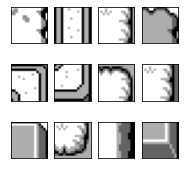

[  0   1   2   4   6  18  21  39  43  51  76  84  85  87  88  96 100 109
 125 126 133 134 155 161 172 178 185]
CLUSTER: 2 - 27/196


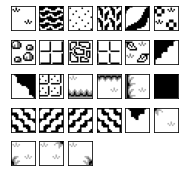

[ 26  68 187 188 189 190 191 192 193 194 195]
CLUSTER: 3 - 11/196


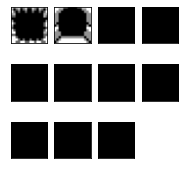

[  3  33  40  55  60  73  94 102 120 146 157 163]
CLUSTER: 4 - 12/196


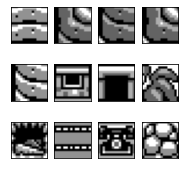

[ 13  19  25  34  37  46  48  98 113 129 151 165 170 174 183]
CLUSTER: 5 - 15/196


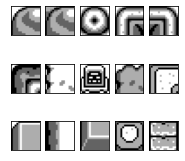

[  5   7  11  20  28  30  32  38  42  44  50  52  54  57  63  64  65  69
  72  79  99 105 115 116 117 118 137 138 143 148 153 158 159 166 167 168
 169 173 175 176 179 181 186]
CLUSTER: 6 - 43/196


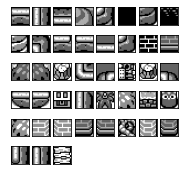

[  8  75  81 156 162 177 180 182]
CLUSTER: 7 - 8/196


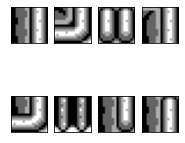

[ 15  16  17  22  24  27  29  31  41  47  59  67  77  78  82  83  86  89
  90  93  97 106 114 119 121 122 123 124 127 128 132 135 136 139 140 142
 149 150 160 184]
CLUSTER: 8 - 40/196


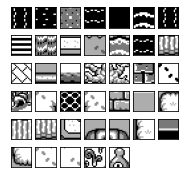

[  9  10  12  14  23  35  36  53  56  61  66  70  71  74  91  92  95 101
 103 104 111 144 145]
CLUSTER: 9 - 23/196


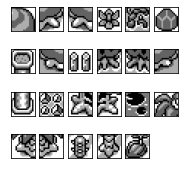

In [308]:
#show the clusters
for i in range(1,k):
    #get the tiles in a group
    ind = np.squeeze(np.where(np.array(l) == i))
    ind = np.atleast_1d(np.array(ind))
    print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    if len(c) == 0:
        continue
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

I'm a fucking idiot :) that works stupidly well

[  7  73  75  79  81 137 138 153 156 162 166 167 168 169 171 173 175 176
 177 179 180 181 182 183 186]
CLUSTER: 1 - 25/196


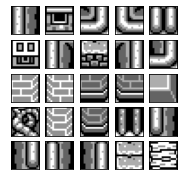

[108 141 147 154 164]
CLUSTER: 2 - 5/196


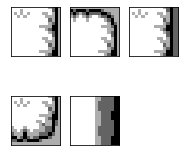

[53 70]
CLUSTER: 3 - 2/196


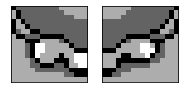

[187 188 189 190 191 192 193 194 195]
CLUSTER: 4 - 9/196


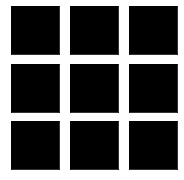

[ 47  49 129 130 131 132 174]
CLUSTER: 5 - 7/196


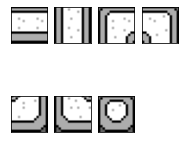

[ 19  25  36  37  48  71  78  86  89  92 104 113 121 122 124 127 128 135
 139 140 142 151 165 170]
CLUSTER: 6 - 24/196


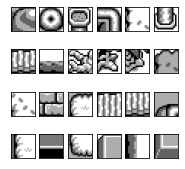

[ 8 33 40 55 60]
CLUSTER: 7 - 5/196


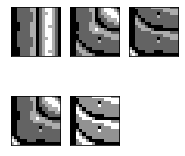

[ 15  16  17  22  24  27  29  31  35  41  45  56  59  67  74  77  82  83
  90  91  93  95  97 103 106 111 112 114 119 123 136 144 149 150 152 160
 184]
CLUSTER: 8 - 37/196


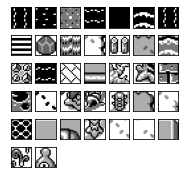

[  0   1   2   4   6  18  21  39  43  51  76  84  85  87  88  96 100 109
 125 126 133 134 155 161 172 178 185]
CLUSTER: 9 - 27/196


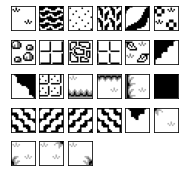

[14]
CLUSTER: 10 - 1/196


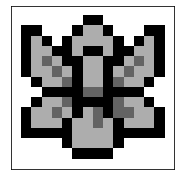

[ 26  68 120]
CLUSTER: 11 - 3/196


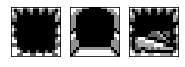

[ 11  46  61  65 159]
CLUSTER: 12 - 5/196


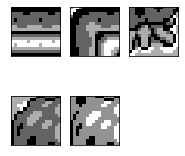

[ 9 10 12 13]
CLUSTER: 13 - 4/196


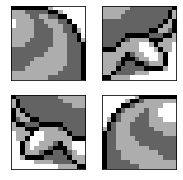

[ 20  23  30  34  38  44  54  57  63  64  66  69  72  80  94  98  99 101
 102 105 115 116 117 118 143 145 146 148 157 158 163]
CLUSTER: 14 - 31/196


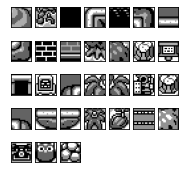

[ 3  5 28 32 42 50 52]
CLUSTER: 15 - 7/196


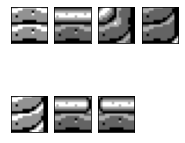

In [310]:
# EXPERIMENT 9 - Literal tile + window location
tile_feat2 = np.array(list(map(lambda x: tile2Color(x,16).flatten()/256,list(ts.values()))))
k = 16
cluster9 = KMeans(n_clusters=k).fit(combineData([exp2_data*0.5,tile_feat2]))
l = list(cluster9.labels_)

#show the clusters
for i in range(1,k):
    #get the tiles in a group
    ind = np.squeeze(np.where(np.array(l) == i))
    ind = np.atleast_1d(np.array(ind))
    print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    if len(c) == 0:
        continue
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

[  7  73  75  79  81 137 138 153 156 162 166 167 168 169 171 173 175 176
 177 179 180 181 182 183 186]
CLUSTER: 1 - 25/196


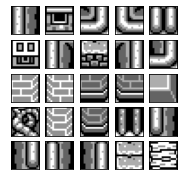

[108 141 147 154 164]
CLUSTER: 2 - 5/196


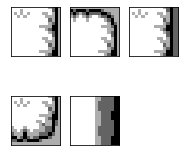

[53 70]
CLUSTER: 3 - 2/196


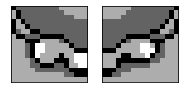

[187 188 189 190 191 192 193 194 195]
CLUSTER: 4 - 9/196


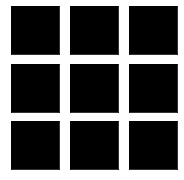

[ 47  49 129 130 131 132 174]
CLUSTER: 5 - 7/196


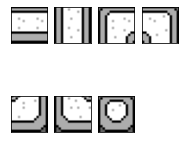

[ 19  25  36  37  48  71  78  86  89  92 104 113 121 122 124 127 128 135
 139 140 142 151 165 170]
CLUSTER: 6 - 24/196


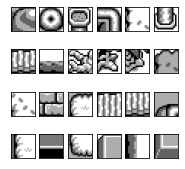

[ 8 33 40 55 60]
CLUSTER: 7 - 5/196


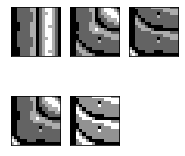

[ 15  16  17  22  24  27  29  31  35  41  45  56  59  67  74  77  82  83
  90  91  93  95  97 103 106 111 112 114 119 123 136 144 149 150 152 160
 184]
CLUSTER: 8 - 37/196


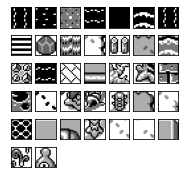

[  0   1   2   4   6  18  21  39  43  51  76  84  85  87  88  96 100 109
 125 126 133 134 155 161 172 178 185]
CLUSTER: 9 - 27/196


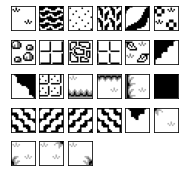

[14]
CLUSTER: 10 - 1/196


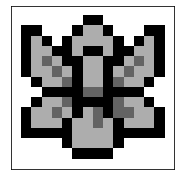

[ 26  68 120]
CLUSTER: 11 - 3/196


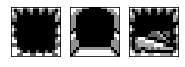

[ 11  46  61  65 159]
CLUSTER: 12 - 5/196


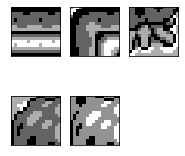

[ 9 10 12 13]
CLUSTER: 13 - 4/196


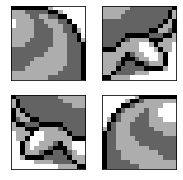

In [320]:
# EXPERIMENT 10 - EXP 9 w/ diff CLUSTERING
from sklearn.cluster import FeatureAgglomeration
k = 14
cluster10 = FeatureAgglomeration(n_clusters=k).fit(combineData([exp2_data*100,tile_feat2]))
l = list(cluster9.labels_)

#show the clusters
for i in range(1,k):
    #get the tiles in a group
    ind = np.squeeze(np.where(np.array(l) == i))
    ind = np.atleast_1d(np.array(ind))
    print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
    if len(c) == 0:
        continue
        
    print("CLUSTER: " + str(i) + " - " + str(len(c)) + "/" + str(len(ts)))
    showCluster(np.array(c))

### GAN TILE GENERATION

[  7  73  75  79  81 137 138 153 156 162 166 167 168 169 171 173 175 176
 177 179 180 181 182 183 186]


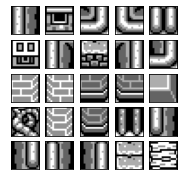

[[[  0  96 168 ...  96   0   0]
  [  0  96 168 ...  96   0   0]
  [  0  96 168 ...  96   0   0]
  ...
  [  0  96 168 ...   0   0   0]
  [  0  96 168 ...   0   0   0]
  [  0  96 168 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0  96  96 ...  96  96   0]
  [  0 248 248 ... 248 248   0]
  ...
  [  0 168 168 ... 168 168   0]
  [  0   0   0 ...   0   0   0]
  [168 168 168 ... 168 168 168]]

 [[  0   0   0 ... 168  96   0]
  [  0   0   0 ... 168  96   0]
  [ 96  96   0 ... 168  96   0]
  ...
  [168 168 168 ...   0   0  96]
  [ 96  96  96 ...   0  96 168]
  [  0   0   0 ... 168 168 248]]

 ...

 [[  0   0  96 ...   0  96 168]
  [  0   0  96 ...  96   0  96]
  [  0   0  96 ... 168  96   0]
  ...
  [  0   0   0 ... 168  96   0]
  [  0   0   0 ... 168  96   0]
  [  0   0   0 ... 168  96   0]]

 [[  0   0   0 ...   0   0   0]
  [  0 168 248 ... 168 168   0]
  [  0 248  96 ... 168 168   0]
  ...
  [  0 248 168 ... 168 168   0]
  [  0 248 248 ... 248 248   0]
  [  0 168 248 ... 248 168  

In [490]:
#grab a cluster to test on
i1 = np.squeeze(np.where(np.array(l) == 1))
print(i1)
c1 = []
for t in i1:
    c1.append(ts[t])
showCluster(c1)
raw_c1 = np.array(list(map(lambda x: tile2Color(x,16),c1)))
print(raw_c1)

In [577]:
import keras
import tensorflow as tf
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import UpSampling2D, Flatten, Reshape, Dense, Input, BatchNormalization, ReLU, Activation, Conv2DTranspose, Conv2D, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy

class ClusterGAN():
    def __init__(self,c):
        self.indices = np.array(list(c.keys()))
        self.raw_tiles = np.array(list(c.values()))
        #print(self.raw_tiles.shape)
        self.noise_dim = 100
        self.gen = None
        self.disc = None
        
    #initialize the gan architecture
    def makeGAN(self):
        #generator
        self.gen = Sequential()
        self.gen.add(Input(shape=(self.noise_dim,)))
        self.gen.add(Dense(1*1*256, use_bias=False, activation='relu'))
        self.gen.add(BatchNormalization())
        self.gen.add(LeakyReLU())
        self.gen.add(Reshape((1, 1, 256)))
        
        self.gen.add(UpSampling2D())
        self.gen.add(Conv2DTranspose(256, kernel_size=5, padding="same",use_bias=False))
        self.gen.add(BatchNormalization())
        self.gen.add(ReLU())
        
        self.gen.add(UpSampling2D())
        self.gen.add(Conv2DTranspose(128, kernel_size=4, padding="same",use_bias=False))
        self.gen.add(BatchNormalization())
        self.gen.add(ReLU())
        
        self.gen.add(UpSampling2D())
        self.gen.add(Conv2DTranspose(64, kernel_size=3, padding="same",use_bias=False))
        self.gen.add(BatchNormalization())
        self.gen.add(ReLU())
        
        self.gen.add(UpSampling2D())
        self.gen.add(Conv2DTranspose(32, kernel_size=2, padding="same",use_bias=False))
        self.gen.add(BatchNormalization())
        self.gen.add(ReLU())
        
        self.gen.add(Conv2DTranspose(1, kernel_size=1, padding="same",use_bias=False))
        self.gen.add(Activation("tanh"))
        
        self.gen.summary()
        
        self.gen.compile()
        
        #discriminator
        self.disc = Sequential()
        
        self.disc.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(16,16,1), padding="same"))
        self.disc.add(LeakyReLU())
        self.disc.add(Dropout(0.3))
        
        self.disc.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        self.disc.add(LeakyReLU())
        self.disc.add(Dropout(0.3))
        
        self.disc.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        self.disc.add(LeakyReLU())
        self.disc.add(Dropout(0.3))
        
        self.disc.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        self.disc.add(LeakyReLU())
        self.disc.add(Dropout(0.3))
        
        self.disc.add(Flatten())
        self.disc.add(Dense(1, activation='sigmoid'))
        
        self.disc.summary()
        
        self.disc.compile()
        
        
        #define optimizers
        self.gen_opt = keras.optimizers.Adam(1e-4)
        self.disc_opt = keras.optimizers.Adam(1e-4)
        
    def disc_loss(self,real,fake):
        cross_entropy = BinaryCrossentropy(from_logits=True)
        real_loss = cross_entropy(tf.ones_like(real), real)
        fake_loss = cross_entropy(tf.zeros_like(fake), fake)
        total_loss = real_loss + fake_loss
        return total_loss
    
    def gen_loss(self,x):
        cross_entropy = BinaryCrossentropy(from_logits=True)
        return cross_entropy(tf.ones_like(x), x)
        
    #trains the gan on the cluster
    def trainGAN(self,epochs):
        #check if gans have been made yet
        if self.gen == None or self.disc == None:
            print("GAN NOT MADE! Creating new GAN...")
            self.makeGAN()
            
        with tqdm(total=(epochs)) as pbar:
            for e in range(epochs):
                #run training on entire cluster
                noise = tf.random.normal([len(self.raw_tiles), self.noise_dim])
                inputTiles = tf.convert_to_tensor(np.expand_dims(self.raw_tiles,axis=3))

                with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                    gen_imgs = self.gen(noise, training=True)

                    real_out = self.disc(inputTiles, training=True)
                    fake_out = self.disc(gen_imgs, training=True)

                    #get loss
                    gen_loss = self.gen_loss(fake_out)
                    disc_loss = self.disc_loss(real_out, fake_out)

                gen_grads = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
                disc_grads = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

                self.gen_opt.apply_gradients(zip(gen_grads, self.gen.trainable_variables))
                self.disc_opt.apply_gradients(zip(disc_grads, self.disc.trainable_variables))
                
                pbar.update(1)
                pbar.set_description(("Loss_DL %f\tLoss_G: %f" % (gen_loss,disc_loss)))
            
                #show some samples
                if e % 10 == 0:
                    self.showSamples(8)
            
    def showSamples(self,n):
        samp = np.array(self.gen(tf.random.normal([n,100]),training=False))
        s = int(math.sqrt(n))
        w = math.ceil(n/s)
        plt.figure(figsize=(3.0,3.0))
        for i in range(n):
            plt.subplot(s,w,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(samp[i].squeeze(),cmap='gray')
        plt.show()
    

In [578]:
c1_gan = ClusterGAN(dict(zip(i1,raw_c1)))

(25, 16, 16)


In [579]:
c1_gan.makeGAN()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 256)               25600     
_________________________________________________________________
batch_normalization_206 (Bat (None, 256)               1024      
_________________________________________________________________
leaky_re_lu_186 (LeakyReLU)  (None, 256)               0         
_________________________________________________________________
reshape_43 (Reshape)         (None, 1, 1, 256)         0         
_________________________________________________________________
up_sampling2d_104 (UpSamplin (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_transpose_204 (Conv2D (None, 2, 2, 256)         1638400   
_________________________________________________________________
batch_normalization_207 (Bat (None, 2, 2, 256)       

Loss_DL 0.474673	Loss_G: 1.440269:   1%|          | 1/100 [00:00<00:18,  5.42it/s]

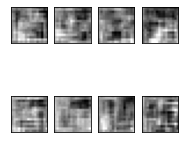

Loss_DL 0.473638	Loss_G: 1.288112:  11%|█         | 11/100 [00:02<00:16,  5.42it/s]

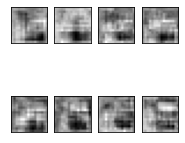

Loss_DL 0.471771	Loss_G: 1.291230:  21%|██        | 21/100 [00:04<00:14,  5.44it/s]

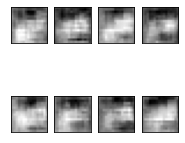

Loss_DL 0.470382	Loss_G: 1.293545:  31%|███       | 31/100 [00:06<00:11,  6.00it/s]

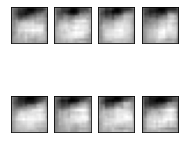

Loss_DL 0.476823	Loss_G: 1.282895:  41%|████      | 41/100 [00:08<00:09,  5.92it/s]

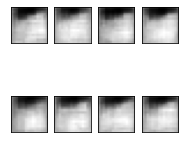

Loss_DL 0.486343	Loss_G: 1.284017:  51%|█████     | 51/100 [00:10<00:08,  6.09it/s]

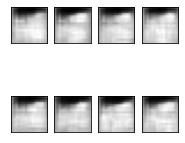

Loss_DL 0.489421	Loss_G: 1.276680:  61%|██████    | 61/100 [00:12<00:06,  5.93it/s]

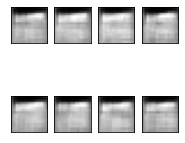

Loss_DL 0.492822	Loss_G: 1.257228:  71%|███████   | 71/100 [00:14<00:04,  5.83it/s]

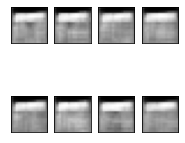

Loss_DL 0.494009	Loss_G: 1.255398:  81%|████████  | 81/100 [00:16<00:03,  6.02it/s]

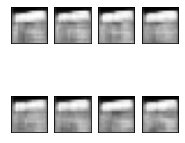

Loss_DL 0.497915	Loss_G: 1.249294:  91%|█████████ | 91/100 [00:18<00:01,  5.75it/s]

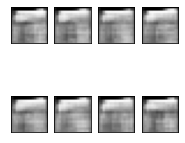

Loss_DL 0.499406	Loss_G: 1.268188: 100%|██████████| 100/100 [00:19<00:00,  6.08it/s]


In [580]:
c1_gan.trainGAN(100)

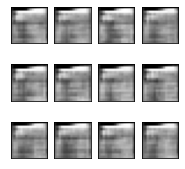

In [581]:
c1_gan.showSamples(12)

In [584]:
full_ts = dict(zip(tiles,list(map(lambda x: tile2Color(x,16),list(ts.values())))))

(196, 16, 16)
GAN NOT MADE! Creating new GAN...
Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 256)               25600     
_________________________________________________________________
batch_normalization_221 (Bat (None, 256)               1024      
_________________________________________________________________
leaky_re_lu_201 (LeakyReLU)  (None, 256)               0         
_________________________________________________________________
reshape_46 (Reshape)         (None, 1, 1, 256)         0         
_________________________________________________________________
up_sampling2d_116 (UpSamplin (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_transpose_219 (Conv2D (None, 2, 2, 256)         1638400   
_________________________________________________________________
batch

  0%|          | 0/100 [00:00<?, ?it/s]

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 8, 8, 32)          320       
_________________________________________________________________
leaky_re_lu_202 (LeakyReLU)  (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_154 (Dropout)        (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 4, 4, 64)          18496     
_________________________________________________________________
leaky_re_lu_203 (LeakyReLU)  (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_155 (Dropout)        (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 2, 2, 128)       

Loss_DL 0.472622	Loss_G: 1.422425:   1%|          | 1/100 [00:00<01:10,  1.41it/s]

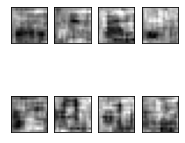

Loss_DL 0.460038	Loss_G: 1.318443:  11%|█         | 11/100 [00:08<01:05,  1.36it/s]

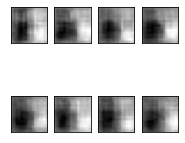

Loss_DL 0.464126	Loss_G: 1.311546:  21%|██        | 21/100 [00:15<00:58,  1.35it/s]

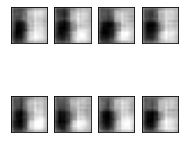

Loss_DL 0.476926	Loss_G: 1.290365:  31%|███       | 31/100 [00:23<00:49,  1.40it/s]

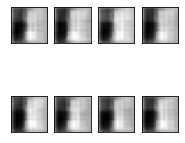

Loss_DL 0.490125	Loss_G: 1.282119:  41%|████      | 41/100 [00:30<00:41,  1.43it/s]

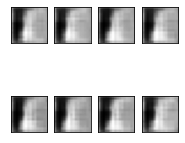

Loss_DL 0.485609	Loss_G: 1.277549:  51%|█████     | 51/100 [00:37<00:34,  1.41it/s]

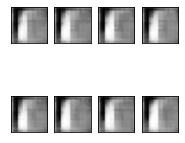

Loss_DL 0.483160	Loss_G: 1.282398:  61%|██████    | 61/100 [00:45<00:28,  1.39it/s]

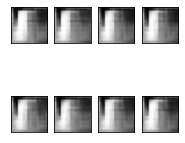

Loss_DL 0.494617	Loss_G: 1.264387:  71%|███████   | 71/100 [00:52<00:20,  1.40it/s]

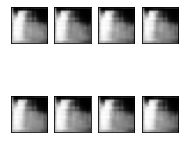

Loss_DL 0.509135	Loss_G: 1.243955:  81%|████████  | 81/100 [01:00<00:14,  1.29it/s]

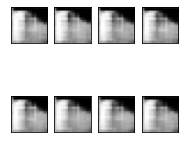

Loss_DL 0.514223	Loss_G: 1.235302:  91%|█████████ | 91/100 [01:08<00:07,  1.27it/s]

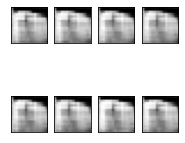

Loss_DL 0.520834	Loss_G: 1.224436: 100%|██████████| 100/100 [01:15<00:00,  1.31it/s]


In [586]:
cAll_gan = ClusterGAN(full_ts)
cAll_gan.trainGAN(100)

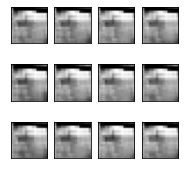

In [587]:
cAll_gan.showSamples(12)

In [684]:
class ClusterGAN2():
    def __init__(self,c,tsize=16):
        self.indices = np.array(list(c.keys()))
        self.raw_tiles = np.array(list(c.values()))
        #print(self.raw_tiles.shape)
        self.latent_dim = 100
        self.gen = None
        self.disc = None
        
    def makeGAN(self):
        
        ### GENERATOR SETUP ###
        
        f = 128    #filters
        t = 16     #tile size to output (t x t) must be multiple of 2
        num_steps = int(math.log(t,2))-2
        
        self.gen = Sequential()
        self.gen.add(Input(shape=(self.latent_dim,)),)
        self.gen.add(Dense(2*2*f))
        self.gen.add(BatchNormalization())
        self.gen.add(LeakyReLU())
        
        self.gen.add(Reshape((2,2,f)))
        assert self.gen.output_shape == (None, 2,2,f)
        
        for i in range(num_steps):
            self.gen.add(Conv2DTranspose(f/(2**(i+1)),kernel_size=(4,4),strides=(2,2),padding='same',use_bias=False))
            self.gen.add(BatchNormalization())
            self.gen.add(LeakyReLU())
                         
        self.gen.add(Conv2DTranspose(1,kernel_size=(4,4),strides=(2,2),padding='same',use_bias=False, activation='tanh'))
        
        self.gen.summary()
        
        
        ### DISCRIMINATOR SETUP ###
        
        self.disc = Sequential()
        self.disc.add(Input(shape=(t,t,1)))
        
        for i in range(num_steps,0,-1):
            self.disc.add(Conv2D(f/(2**(i)),kernel_size=(4,4),strides=(2,2),padding='same',use_bias=False))
            self.disc.add(BatchNormalization())
            self.disc.add(LeakyReLU())
            
        self.disc.add(Flatten())
        self.disc.add(Dropout(0.3))
        self.disc.add(Dense(1,activation='sigmoid'))
        
        self.disc.summary()
        
        
        ### OPTIMIZER SETUP ###
        self.gen_opt = keras.optimizers.Adam(1e-4)
        self.disc_opt = keras.optimizers.Adam(1e-4)
        
    #discriminator loss function
    def disc_loss(self,real,fake):
        cross_entropy = BinaryCrossentropy(from_logits=True)
        real_loss = cross_entropy(tf.ones_like(real), real)
        fake_loss = cross_entropy(tf.zeros_like(fake), fake)
        total_loss = real_loss + fake_loss
        return total_loss, real_loss, fake_loss
    
    #generator loss function
    def gen_loss(self,x):
        cross_entropy = BinaryCrossentropy(from_logits=True)
        return cross_entropy(tf.ones_like(x), x)
        
    #trains the gan on the cluster
    def trainGAN(self,epochs):
        #check if gans have been made yet
        if self.gen == None or self.disc == None:
            print("GAN NOT MADE! Creating new GAN...")
            self.makeGAN()
            
        with tqdm(total=(epochs)) as pbar:
            seed = tf.random.normal([8,self.latent_dim])
            
            gls = []
            rls = []
            fls = []
            
            for e in range(epochs):
                #run training on entire cluster
                noise = tf.random.normal([len(self.raw_tiles), self.latent_dim])
                inputTiles = tf.convert_to_tensor(np.expand_dims(self.raw_tiles,axis=3))

                with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                    gen_imgs = self.gen(noise, training=True)

                    real_out = self.disc(inputTiles, training=True)
                    fake_out = self.disc(gen_imgs, training=True)

                    #get loss
                    gen_loss = self.gen_loss(fake_out)
                    disc_loss, rl, fl = self.disc_loss(real_out, fake_out)
                    
                    gls.append(gen_loss)
                    rls.append(rl)
                    fls.append(fl)

                gen_grads = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
                disc_grads = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

                self.gen_opt.apply_gradients(zip(gen_grads, self.gen.trainable_variables))
                self.disc_opt.apply_gradients(zip(disc_grads, self.disc.trainable_variables))
                
                pbar.update(1)
                pbar.set_description(("Loss_DL %f\tLoss_G: %f" % (gen_loss,disc_loss)))
            
                #show some samples
                if e % 500 == 0:
                    self.showSamples(8,seed)
                    
        return gls, rls, fls
            
    #show some sample output from the generator
    def showSamples(self,n,seed=None):
        #create samples from gan
        if seed == None:
            samp = np.array(self.gen(tf.random.normal([n,self.latent_dim]),training=False))
        else:
            samp = np.array(self.gen(seed,training=False))
            n = len(seed)
            
        #show in grid format
        s = int(math.sqrt(n))
        w = math.ceil(n/s)
        plt.figure(figsize=(3.0,3.0))
        for i in range(n):
            plt.subplot(s,w,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(samp[i].squeeze(),cmap='gray')
        plt.show()
        

In [685]:
c1GAN = ClusterGAN2(dict(zip(i1,raw_c1)))
c1GAN.makeGAN()

Model: "sequential_156"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 512)               51712     
_________________________________________________________________
batch_normalization_355 (Bat (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_339 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
reshape_76 (Reshape)         (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose_320 (Conv2D (None, 4, 4, 64)          131072    
_________________________________________________________________
batch_normalization_356 (Bat (None, 4, 4, 64)          256       
_________________________________________________________________
leaky_re_lu_340 (LeakyReLU)  (None, 4, 4, 64)       

Loss_DL 0.526970	Loss_G: 1.467710:   0%|          | 1/5000 [00:00<05:29, 15.19it/s]

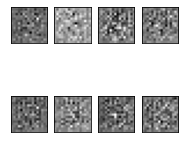

Loss_DL 0.688131	Loss_G: 1.016020:  10%|█         | 501/5000 [00:22<03:27, 21.65it/s]

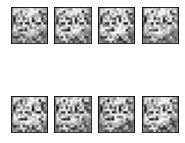

Loss_DL 0.667816	Loss_G: 1.183924:  20%|██        | 1001/5000 [00:45<02:59, 22.32it/s]

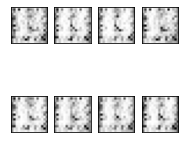

Loss_DL 0.682477	Loss_G: 1.116138:  30%|███       | 1501/5000 [01:08<02:44, 21.32it/s]

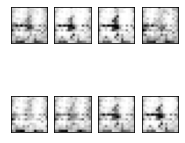

Loss_DL 0.690070	Loss_G: 1.060200:  40%|████      | 2001/5000 [01:31<02:13, 22.54it/s]

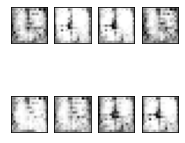

Loss_DL 0.685665	Loss_G: 1.019914:  50%|█████     | 2501/5000 [01:55<01:54, 21.89it/s]

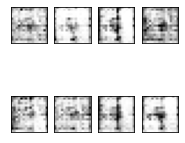

Loss_DL 0.692383	Loss_G: 1.007934:  60%|██████    | 3001/5000 [02:19<01:28, 22.51it/s]

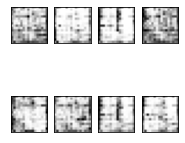

Loss_DL 0.692721	Loss_G: 1.007156:  70%|███████   | 3501/5000 [02:42<01:05, 22.92it/s]

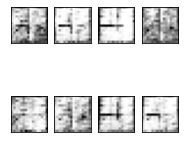

Loss_DL 0.692642	Loss_G: 1.007162:  80%|████████  | 4001/5000 [03:04<00:43, 23.13it/s]

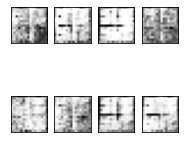

Loss_DL 0.693045	Loss_G: 1.006699:  90%|█████████ | 4501/5000 [03:26<00:21, 23.19it/s]

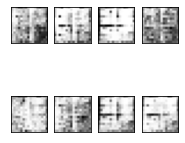

Loss_DL 0.693106	Loss_G: 1.006512: 100%|██████████| 5000/5000 [03:49<00:00, 23.34it/s]


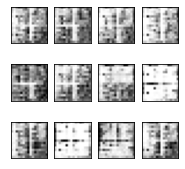

In [686]:
EPOCHS = 5000
gen_loss, real_loss, fake_loss = c1GAN.trainGAN(EPOCHS)
c1GAN.showSamples(12)

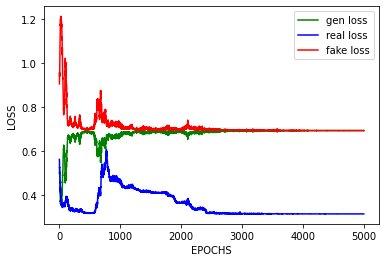

In [687]:
plt.plot(range(EPOCHS),gen_loss,label='gen loss', color='g')
plt.plot(range(EPOCHS),real_loss,label='real loss', color='b')
plt.plot(range(EPOCHS),fake_loss,label='fake loss', color='r')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()
plt.show()